# Offset reflectivity

Let's compare all the reflectivity equations!

In [1]:
import bruges as b
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import welly

In [2]:
vp1, vs1, rho1, vp2, vs2, rho2 = 2000, 900, 2100, 2200, 1200, 2200
theta = np.arange(0, 90, 0.2)

### Compute reflectivities

In [3]:
r = b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta)

In [4]:
a = b.reflection.akirichards_alt(vp1, vs1, rho1, vp2, vs2, rho2, theta)

In [5]:
r0, rg, rf = b.reflection.shuey(vp1, vs1, rho1, vp2, vs2, rho2, theta, terms=True)
s = r0 + rg

In [6]:
f = b.reflection.fatti(vp1, vs1, rho1, vp2, vs2, rho2, theta)

In [7]:
bo = b.reflection.bortfeld(vp1, vs1, rho1, vp2, vs2, rho2, theta)

In [8]:
h = b.reflection.hilterman(vp1, vs1, rho1, vp2, vs2, rho2, theta)

In [9]:
z = b.reflection.zoeppritz(vp1, vs1, rho1, vp2, vs2, rho2, theta)

In [10]:
zr = b.reflection.zoeppritz_rpp(vp1, vs1, rho1, vp2, vs2, rho2, theta)

### Critical angle and phase rotation

In [11]:
ca = np.degrees(np.arcsin(vp1 / vp2))
ca2 = np.degrees(np.arcsin(vp1 / vs2))

/home/matt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arcsin
  


In [12]:
p = np.arctan2(np.imag(z), np.real(z))
ph = p.copy() / np.pi

In [13]:
ph[ph==1] = 0

In [14]:
ph[ph<0] = 2 + ph[ph<0]

### Time shift

In [15]:
freq = 5
ts = ph / (2 * freq)

### Plot

/home/matt/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


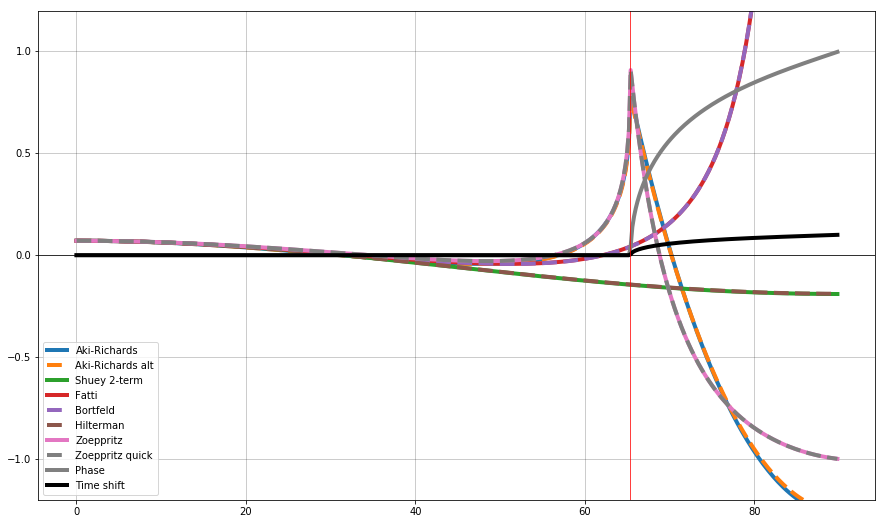

In [16]:
plt.figure(figsize=(15, 9))

plt.plot(theta, r, label='Aki-Richards', lw=4)
plt.plot(theta, a, '--', label='Aki-Richards alt', lw=4)
plt.plot(theta, s, label='Shuey 2-term', lw=4)
plt.plot(theta, f, label='Fatti', lw=4)
plt.plot(theta, bo, '--', label='Bortfeld', lw=4)
plt.plot(theta, h, '--', label='Hilterman', lw=4)
plt.plot(theta, z, label='Zoeppritz', lw=4)
plt.plot(theta, zr, '--', label='Zoeppritz quick', lw=4)
plt.plot(theta, ph, 'gray', label='Phase', lw=4)
plt.plot(theta, ts, 'k', label='Time shift', lw=4)

plt.ylim(-1.2, 1.2)
plt.axhline(0, color='k', lw=0.75)
plt.axvline(ca, color='r', lw=0.75)
plt.axvline(ca2, color='r', lw=0.75)
plt.legend(loc='lower left')
plt.grid(color='k', alpha=0.25)